In [1]:
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import acf as compute_acf

from neurodsp.sim import sim_oscillation
from neurodsp.spectral import compute_spectrum

from timescales.sim import sim_ar
from timescales.fit import ACF
from timescales.conversions import phi_to_tau
from timescales.autoreg import compute_ar_spectrum
from timescales.plts import set_default_rc
set_default_rc()

# 03. ACF Objects

This tutorials explores the use of the ACF objects.

In [2]:
# Settings
n_seconds = 20
fs = 1000
phi = 0.98
tau = phi_to_tau(phi, fs)

# Simulate a signal
np.random.seed(0)
sig = sim_ar(n_seconds, fs, phi)
sig_osc = sim_oscillation(n_seconds, fs, 10) * 2
sig += sig_osc

In [3]:
# Compute spectrum using method
acf = ACF()
acf.compute_acf(sig, fs)

# Or using an external function
corrs = compute_acf(sig, nlags=500, qstat=False, fft=True)
lags = np.arange(len(corrs))
acf = ACF(lags, corrs, fs)

### Fitting: 1d

PSD objects support two ACF models. The first is a simple exponential decay - appropropriate when no oscillations are present. A second damped cosine model is available when oscillations are present. However, when multiple oscillatons are present, the PSD models is suggested.

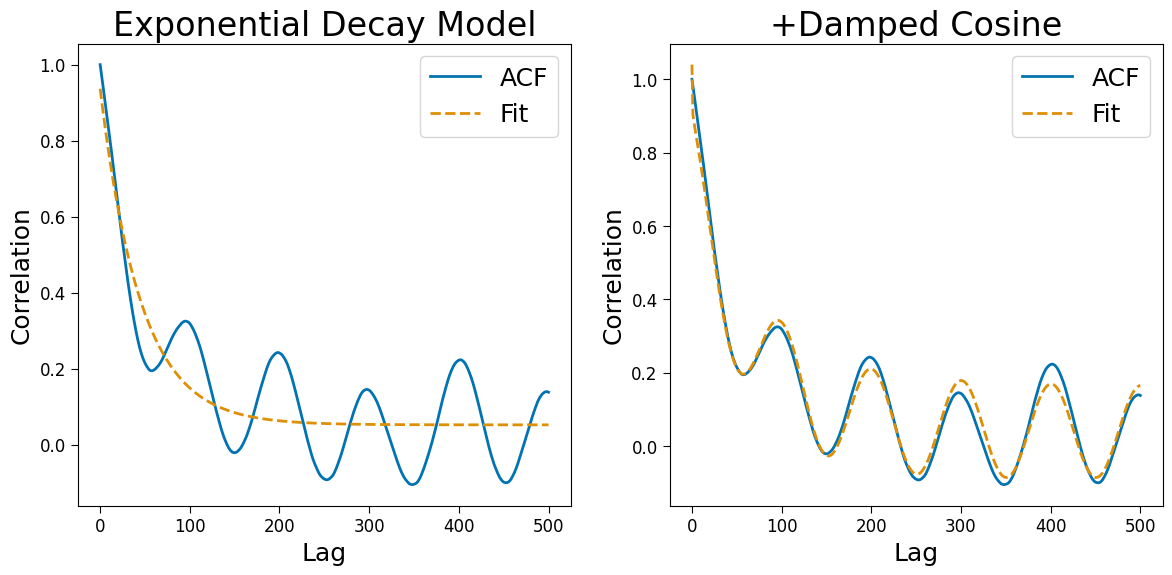

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))

# Exponential
acf.fit()
acf.plot(ax=axes[0], title='Exponential Decay Model')

# Damped cosine
acf_cos = ACF()
acf_cos.compute_acf(sig, fs, nlags=500)
acf_cos.fit(with_cos=True)
acf_cos.plot(ax=axes[1], title='+Damped Cosine')

### Fitting: 2d

2d arrays of signals or correlations are supported.

In [5]:
# Simulate
fs = 1000
n_seconds = 5
nsigs = 20

sigs = np.zeros((nsigs, int(n_seconds * fs)))
sig_osc = sim_oscillation(n_seconds, fs, 10) * 2
for ind in range(nsigs):
    np.random.seed(ind)
    sigs[ind] = sim_ar(n_seconds, fs, phi)
    sigs[ind] += sig_osc

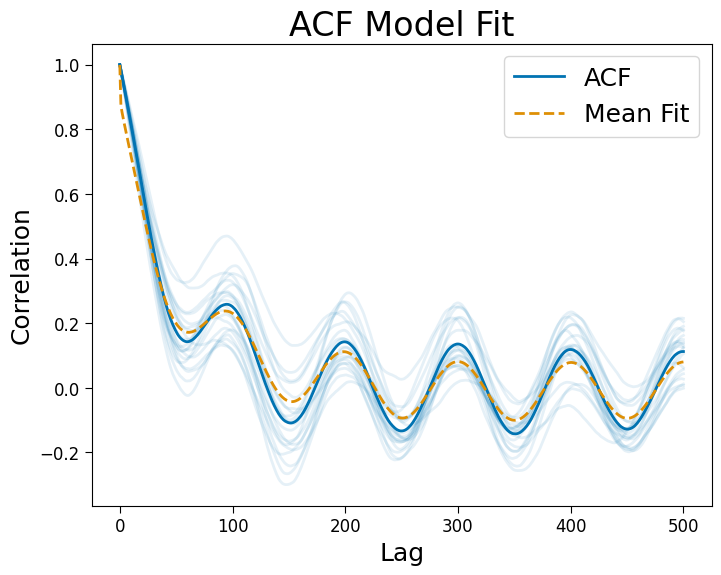

In [6]:
# Fit
acf = ACF()
acf.compute_acf(sigs, fs, nlags=500)
acf.fit(with_cos=True, n_jobs=-1)
acf.plot()

### Results

Optimized parameters, labels, and model r-squared values are stored as attributes.

In [7]:
acf.param_names

['exp_tau',
 'osc_tau',
 'osc_gamma',
 'osc_freq',
 'amp_ratio',
 'height',
 'offset']

In [8]:
acf.params[:5]

array([[ 1.12875868e-01,  1.00000000e+00,  1.00000000e-01,
         4.97388789e+00,  6.39525855e-01,  1.00000000e+00,
        -4.26471854e-02],
       [ 5.75201936e-02,  8.87508748e-03,  1.00000000e-01,
         3.70579009e-01,  9.40816199e-01,  1.00000000e+00,
        -4.68383136e-02],
       [ 5.78820863e-02,  1.00000000e+00,  1.00000000e-01,
         5.00499062e+00,  7.51731006e-01,  1.00000000e+00,
        -5.61469803e-02],
       [ 3.75857428e-02,  1.00000000e+00,  1.00000000e-01,
         1.15680041e+00,  7.93926334e-01,  1.00000000e+00,
         2.00232530e-02],
       [ 3.98317671e-02,  1.00000000e+00,  1.00000000e-01,
         5.01845666e+00,  7.25449032e-01,  1.00000000e+00,
        -1.64030746e-03]])

In [9]:
acf.rsq[:5]

array([0.96358294, 0.86782517, 0.95496423, 0.84557462, 0.91802808])